In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
data = pd.read_excel('titanic.xls')

In [16]:
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [10]:
#head pour afficher les elt de la tete du tbleau
#data.head
#shape pour verify the size
#data.shape
#drop pour eliminer les colomn
#data.drop()
#describe produt les statistic de base pour le donnees
#data.describe(()b
#fillna pour completer les donnees manquante par une valeur par defaut
#data.fillna(data['age']).mean())

#dropna pour eliminer les donnees manquantes ie les case vide
#data.dropna(axis = 0)

#dropna est mieux que fillna puisque il est mieux d'avoir une petite perte que de travailler avec les donnees corrompues
#groupby

(1309, 14)

In [19]:
# Faiasons l'analyse des donnes de passager de titanic
#drop()
data = data.drop(['name', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'boat', 'body', 'home.dest'], axis=1)

In [20]:
#describe()
data.describe()

,pclass,survived,age
count,1309.000000,1309.000000,1046.000000
mean,2.294882,0.381971,29.881135
std,0.837836,0.486055,14.413500
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,21.000000
50%,3.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


In [21]:
#dropna
data = data.dropna(axis=0)

In [22]:
data.shape

(1046, 4)

In [23]:
data.describe()

,pclass,survived,age
count,1046.000000,1046.000000,1046.000000
mean,2.207457,0.408222,29.881135
std,0.841497,0.491740,14.413500
min,1.000000,0.000000,0.166700
25%,1.000000,0.000000,21.000000
50%,2.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


<AxesSubplot:>

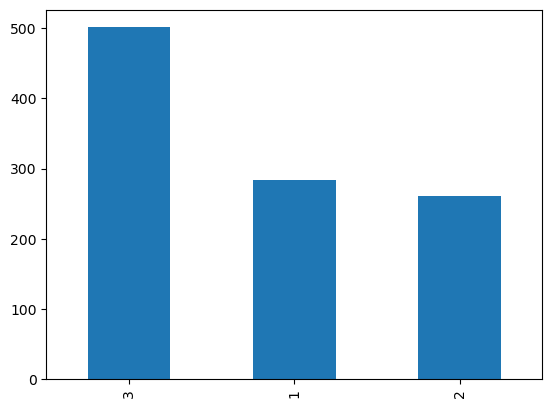

In [25]:
#verify l nombre de passager dans chacune des classe

data['pclass'].value_counts().plot.bar()

<AxesSubplot:>

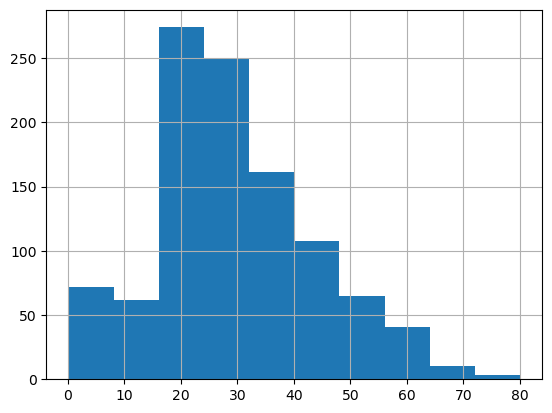

In [26]:
data['age'].hist()

In [27]:
#groupby pour grouper les colonn 
data.groupby(['sex', 'pclass']).mean()

survived        age
sex    pclass                     
female 1       0.962406  37.037594
       2       0.893204  27.499191
       3       0.473684  22.185307
male   1       0.350993  41.029250
       2       0.145570  30.815401
       3       0.169054  25.962273

In [ ]:
###DataFrame Et Series

#data['age'] = serie(ndarray)

#data['age'][0:10] (indexing)

#data[data['age']<18] (boolean indexing)

#data[['age','pclass']]=DataFrame

#data.iloc[0:2, 0:2]->localisation par index

#data.loc[0:2, 'age']

In [28]:
#modifier la colonn e 'AGE' afin de creer 4 categories:

#. Cat0 : <20 ans
#. Cat1 : 20-30 ans
#. Cat2 : 30-40 ans
#. Cat3 : +40 ans


#solution(boolean indexing)

data.loc[data['age'] <= 20, 'age'] = 0
data.loc[(data['age'] > 20) & (data['age'] <= 30), 'age'] = 1
data.loc[(data['age'] > 30) & (data['age'] <= 40), 'age'] = 2
data.loc[data['age'] > 40, 'age'] = 3

In [29]:
data.head()

,pclass,survived,sex,age
0,1,1,female,1.0
1,1,1,male,0.0
2,1,0,female,0.0
3,1,0,male,1.0
4,1,0,female,1.0


In [30]:
data['age'].value_counts()

1.0    361
0.0    248
3.0    227
2.0    210
Name: age, dtype: int64

In [31]:
data.groupby(['age']).mean()

,pclass,survived
age,,
0.0,2.568548,0.459677
1.0,2.371191,0.371191
2.0,2.109524,0.423810
3.0,1.643172,0.396476


In [33]:
#function map
#la solution selon map()
#USed: Data['age'].map9lambda x: x=1)

data['age'].map(lambda x:x+1)

0       2.0
1       1.0
2       1.0
3       2.0
4       2.0
       ... 
1301    4.0
1304    1.0
1306    2.0
1307    2.0
1308    2.0
Name: age, Length: 1046, dtype: float64

In [34]:
def category_ages(age):
    if age <= 20:
        return '<20 ans'
    elif (age > 20) & (age <= 30):
        return '20-30 ans'
    elif (age > 30) & (age <= 40):
        return '30-40 ans'
    else:
        return '+40 ans'

In [35]:
data['age'].map(category_ages)

0       <20 ans
1       <20 ans
2       <20 ans
3       <20 ans
4       <20 ans
         ...   
1301    <20 ans
1304    <20 ans
1306    <20 ans
1307    <20 ans
1308    <20 ans
Name: age, Length: 1046, dtype: object

In [36]:
#chhanger des string en num
#3 methode: map, replace, cat.codes

data['sex'].map({'male':0, 'female':1})

0       1
1       0
2       1
3       0
4       1
       ..
1301    0
1304    1
1306    0
1307    0
1308    0
Name: sex, Length: 1046, dtype: int64

In [38]:
data['sex'].replace(['male', 'female'], [0, 1])

0       1
1       0
2       1
3       0
4       1
       ..
1301    0
1304    1
1306    0
1307    0
1308    0
Name: sex, Length: 1046, dtype: int64

In [40]:
#en cas de grand dataset
data['sex'].astype('category').cat.codes

0       0
1       1
2       0
3       1
4       0
       ..
1301    1
1304    0
1306    1
1307    1
1308    1
Length: 1046, dtype: int8